<a href="https://colab.research.google.com/github/brownr16/electromagnetics_modelling/blob/main/VSI_averagedModel_zeroPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Averaged Model of Voltage Source Inverter: Zero Power Factor with Voltage Leading</h1></b>

Dr. Bingsen Wang

5/3/2023
</center>

#Introduction



At the early design stage, it is often desirable to preliminarily size some components whose specifications are subsequently refined as the program progresses further into the design process. 

For instance, in electric vehicles, we may have some approximate ratings for the power, voltages and currents to start with. The immediate needs may be to determine some specifications of the motor, inverter, and high-voltage battery. We often encounter needs to determine the dc current from the battery given some ac current requirement from the motor. Although it is not important to the topic, the current requirement typically arises from the torque requirement at the vehicle level depending on the driving profile that the design is targeted for.

This **averaged model** intends to capture the very very basic information without complicated math. The hope is that this may help someone without the power electronics background understand and carry out some calculations. The animation by the Python code intends to help visulally and intuitive make sense out of the math involved.







#General Assumptions

Since the averaged model only conerns with the **basic information** that matters to the power conversion, the switching details is definitely omitted.



##Sinusoidal Load Currents

Without loss of generality, the load currents are in cosine functions with phase-$u$ having zero phase angle. Since the root-mean-square (rms) values are often given for motor currents, the current amplitude $\sqrt{2}I_{rms}$ is used in the expression. There are plethora of resources online that explains where $\sqrt{2}$ comes from for sinusoidal waveforms. 

Here are the first three equations for the load currents of phase-$u,v,w$. Another commonly used notation is phase-$a,b,c$. In this document, the former is adopted since it is more commonly used in automotive industry. It seems that the latter is more frequently employed in power systems. Here the phase angles are in radians which can be easily converted to degrees if you would like to by $1\ rad = {1\over\pi}\times 180\ \deg$. The commonly used $2\pi\over3$ radians in three-phase balanced system correspond to $120$ degrees.

$$\begin{align}
i_u(t) &= \sqrt2 I_{rms}\cos(\omega t)\tag{1}\\
i_v(t) &= \sqrt2 I_{rms}\cos\left(\omega t - {2\pi\over3} \right)\tag{2}\\
i_w(t) &= \sqrt2 I_{rms}\cos\left(\omega t + {2\pi\over3} \right)\tag{3}
\end{align}$$
where $\omega$ is the angular fundamental frequency that is related to the frequency $f$ in Hz by $\omega = 2\pi f$. The fundamental frequency is related to the motor speed and number of poles or pole-pairs of the motor. It is worth noting that the phase angle in (3) can be either $+{2\pi\over3}$ or $-{4\pi\over3}$ since $+{2\pi\over3} =2\pi -{4\pi\over3}$ and $2\pi$ radians or $360$ degrees make no difference to a sinusoidal function.

#Modulation Functions Being Sinusoidal with DC Offset

The modulation function is the low-frequency, which is relative to the switching frequency, time-varying singnal that is used to deterine what percentage of duration each switch should be kept on. This *percentage of duration* is often known as **duty ratio** or **duty cycle**. I personally prefer the former over the latter which does not carry any significance in this discussion. The duty ratio is practically feasible only if it takes any value between 0 and 1, inclusively.

Let the modulation functions be defined as
$$\begin{align}
m_u(t) &= \frac{1+M\cos(\omega t+\phi)}{2}\tag{4}\\
m_v(t) &= \frac{1+M\cos\left(\omega t + \phi - {2\pi\over3} \right)}{2}\tag{5}\\
m_w(t) &= \frac{1+M\cos\left(\omega t + \phi + {2\pi\over3} \right)}{2}\tag{6}
\end{align}$$
where $\phi$ is the power factor angle that give the power factor $pf=\cos\phi$; $M$ is the modulation index. The maximum value of $M$ is 1 for sinusoidal pulse width modulation (SPWM) while the maximum value of $M$ is $2\over\sqrt3$ for space vector pulse width modulation (SVPWM). The explanation will be presented in a different document. For this discusstion, equations (4)-(6) will be utilized as the basis.

#Derivation of DC-Link Current

With equations (1)-(6), the dc link current, or more accurately the averaged dc link current without switching details, is readily derived. For a voltage source inverter (VSI), there are three high-side switches and three low-side switches. Let's focus on the high-side switches only and assume (4)-(6) are for high-side switches. The the averaged current through the high side switches are
$$\begin{align}
i_{hu}(t) &= m_u(t)i_u(t)\tag{7}\\
i_{hv}(t) &= m_v(t)i_v(t)\tag{8}\\
i_{hw}(t) &= m_w(t)i_v(t)\tag{9}
\end{align}$$

With the derivation details being omitted, substituting (1)-(6) in (7)-(9) yields
$$\begin{align}
i_{hu}(t) &= \frac{\sqrt2I_{rms}}{2}\cos\left(\omega t \right)+ \frac{\sqrt2MI_{rms}}{4}\cos\left(2\omega t+2\phi \right) + \frac{\sqrt2MI_{rms}}{4}\cos(\phi)\tag{10}\\
i_{hv}(t) &= \frac{\sqrt2I_{rms}}{2}\cos\left(\omega t - {2\pi\over3} \right)+ \frac{\sqrt2MI_{rms}}{4}\cos\left(2\omega t+2\phi - {4\pi\over3} \right) + \frac{\sqrt2MI_{rms}}{4}\cos(\phi)\tag{11}\\
i_{hw}(t) &= \frac{\sqrt2I_{rms}}{2}\cos\left(\omega t + {2\pi\over3} \right)+ \frac{\sqrt2MI_{rms}}{4}\cos\left(2\omega t+2\phi + {4\pi\over3} \right) + \frac{\sqrt2MI_{rms}}{4}\cos(\phi)\tag{12}
\end{align}$$

The averaged dc link current is
$$i_{dc}(t) = i_{hu}(t) + i_{hv}(t) + i_{hw}(t) \tag{13}$$

With the derivation details being omitted again, substituting (10)-(12) in (13) yields
$$i_{dc}(t) = I_{dc}= \frac{3\sqrt2MI_{rms}}{4}\cos(\phi)\tag{14}$$
It is worthing noting that all the ac terms in (10)-(12) get cancelled when they are summed since a set of blanced three-phase signals always add up to zero.

##Maximum DC-Link or Battery Current

###Sinusoidal PWM Case

For SPWM, $I_{dc}$ maximizes when $M=1$ and $\cos\phi =1$. Hence,
$$I_{dcmax\_SPWM} = {3\over4}\sqrt2I_{rms} \tag{15}$$

###Space-Vector PWM Case

For SVPWM, $I_{dc}$ maximizes when $M={2\over\sqrt3}$ and $\cos\phi =1$. Hence,
$$I_{dcmax\_SVPWM} = {\sqrt3\over2}\sqrt2I_{rms} \tag{16}$$

#Python Code
The Python code illustrates averaged model of a VSI.

<ipython-input-3-ca4c1d4bd533>:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-3-ca4c1d4bd533>:120: MatplotlibDeprecationWarning: Passing the width parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(mp.Arrow(1.75 - 0.5*iac[k],0.9-k*0.9,iac[k],0,0.3,color=clst[k]))
<ipython-input-3-ca4c1d4bd533>:121: MatplotlibDeprecationWarning: Passing the width parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(mp.Arrow(-2.2+k*1.5 ,1.5+ 0.5*ih[k],0,-ih[k],0.3,color=clst[k]))
<ipython-input-3-ca4c1d4bd533>:122: MatplotlibDeprecationWarning: Passing the width parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  a

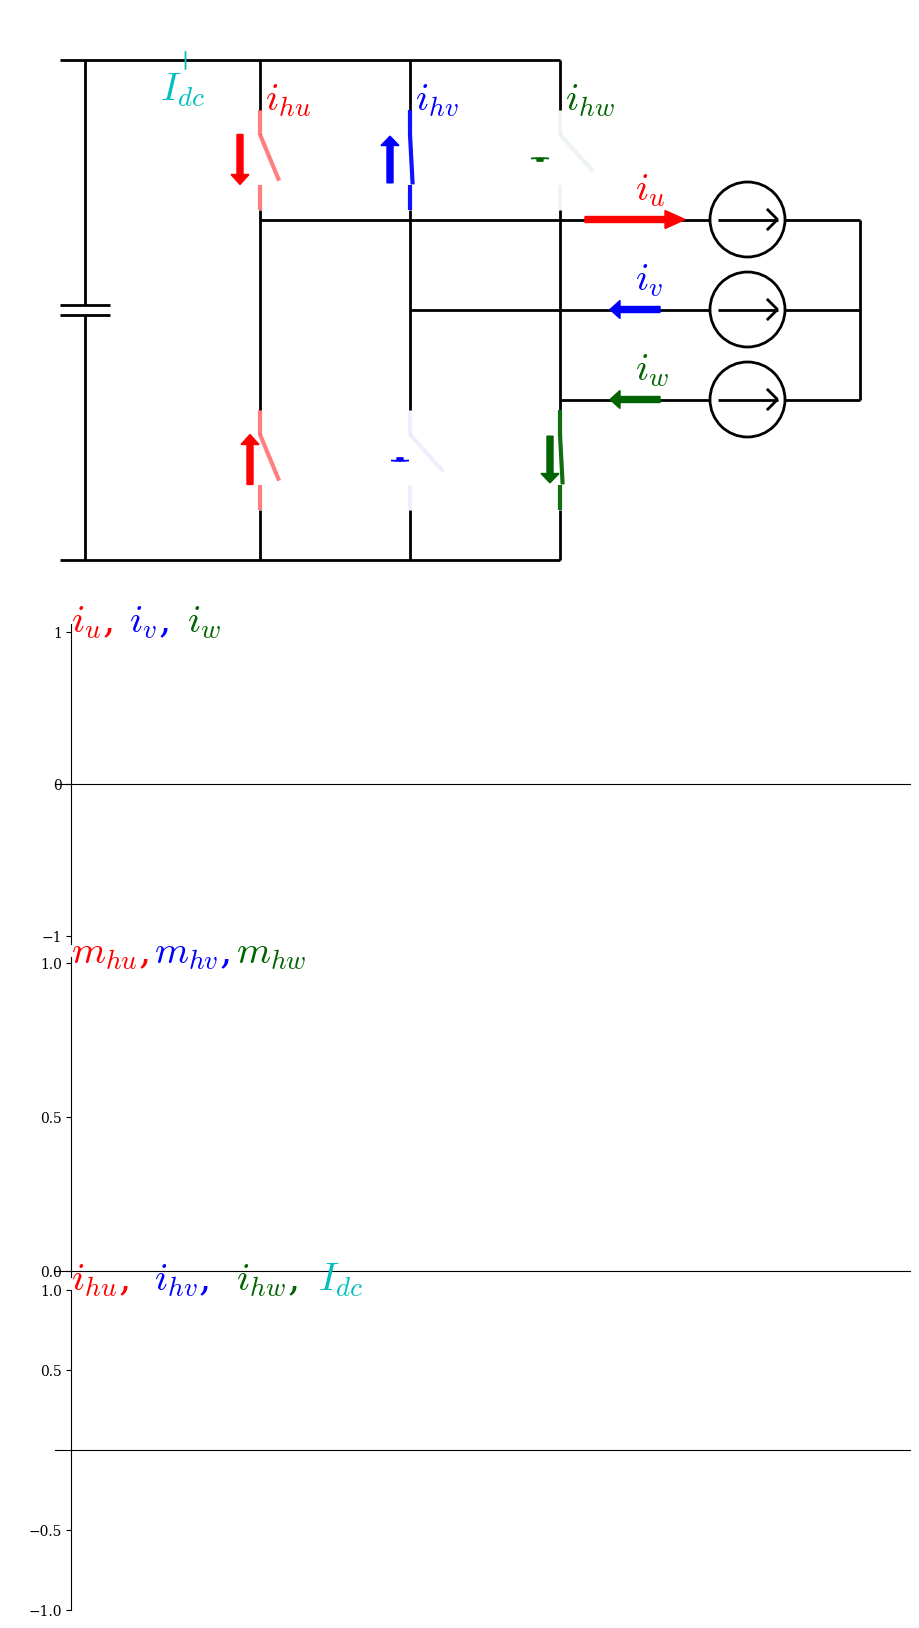

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,pi
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.path import Path
import matplotlib.patches as mp
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#load currents
def iac(t,Ipk,f):
  iact=[]
  for k in range(3):
    iact.append(Ipk*cos(2*pi*f*t-k*2*pi/3))
  return iact

#modulation functions for high-side switches
def mh(t,M,f,phi):
  mt=[]
  for k in range(3):
    mt.append(0.5+0.5*M*cos(2*pi*t+phi-k*2*pi/3))
  return mt

#high-side siwtch currents
def ih(t,Ipk,M,f,phi):
  iht=[]
  for k in range(3):
    iht.append(iac(t,Ipk,f)[k]*mh(t,M,f,phi)[k])
  return iht

def drawSwitch(ax,x0,y0,h,theta,lw,color):
  """
  x0,y0: location of the bottom tip of the switch for vertical switch
  h: hight
  theta: open angle of the throw in degree
  lw: line width
  """
  ax.add_patch(mp.PathPatch(Path([(x0,y0),
                                  (x0,y0+h*0.25),
                                  (x0,y0+h*0.75),
                                  (x0,y0+h)],
                                 [Path.MOVETO,
                                  Path.LINETO,
                                  Path.MOVETO,
                                  Path.LINETO]),
                            lw=lw,ec=color))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0+h*0.75,theta)+ax.transData
  ax.add_patch(mp.PathPatch(Path([(x0,y0+h*0.75),
                                  (x0,y0+h*0.25)],
                                 [Path.MOVETO,
                                  Path.LINETO]),
                            lw=lw,ec=color,transform=rot))
  return

def drawCurrentSource(ax,x0,y0,d,theta,lw):
  """
  x0,y0: center of the circle
  d: diameter of the circle
  h: hight
  theta: direction of the arrow, 0 for horizontal right
  lw: line width
  """
  ax.add_patch(mp.Circle((x0,y0),d*0.5,lw=lw,ec='k',fc='none'))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  pth1 = mp.PathPatch(Path([(x0-0.4*d,y0),(x0+0.4*d,y0)], [Path.MOVETO,Path.LINETO]))
  pth2 = mp.PathPatch(Path([(x0+0.4*d,y0),(x0+0.4*d - 0.2*d*cos(pi/4),y0 + 0.2*d*cos(pi/4))], [Path.MOVETO,Path.LINETO]))
  pth3 = mp.PathPatch(Path([(x0+0.4*d,y0),(x0+0.4*d - 0.2*d*cos(pi/4),y0 - 0.2*d*cos(pi/4))], [Path.MOVETO,Path.LINETO]))
  pc=PatchCollection([pth1,pth2,pth3],ec='k',lw=lw,transform=rot)
  ax.add_collection(pc)
  return

#draw the VSI without switches, non-animated part
def drawVSIna(ax,lw):
  ax.add_patch(mp.PathPatch(Path([(-4,2.5),(1,2.5),(-4,-2.5),(1,-2.5)],
                                 [Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO]),lw=lw))
  tx_iac=[r'$i_u$',r'$i_v$',r'$i_w$']
  tx_ih=[r'$i_{hu}$',r'$i_{hv}$',r'$i_{hw}$']
  
  for k in range(3):
    ax.add_patch(mp.PathPatch(Path([(-2+k*1.5,2.5),
                                    (-2+k*1.5,2),
                                    (-2+k*1.5,1),
                                    (-2+k*1.5,-1),
                                    (-2+k*1.5,-2),
                                    (-2+k*1.5,-2.5)],
                                   [Path.MOVETO,
                                    Path.LINETO,
                                    Path.MOVETO,
                                    Path.LINETO,
                                    Path.MOVETO,
                                    Path.LINETO]),lw=lw))
    ax.add_patch(mp.PathPatch(Path([(-2+k*1.5,0.9-k*0.9),
                                    (2.5,0.9-k*0.9),
                                    (3.25,0.9-k*0.9),
                                    (4,0.9-k*0.9)],[Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO]),lw=lw))
    drawCurrentSource(ax,2.875,0.9-k*0.9,0.75,0,lw)
    ax.text(1.75,1.1-k*0.9,tx_iac[k],size=28,color=clst[k])
    ax.text(-1.95+k*1.5,2,tx_ih[k],size=28,color=clst[k])
  ax.text(-3,2.1,r'$I_{dc}$',size=28,color='c')
  ax.add_patch(mp.PathPatch(Path([(4,0.9),(4,-0.9)],[Path.MOVETO,Path.LINETO]),lw=lw))
  ax.add_patch(mp.PathPatch(Path([(-3.75,2.5),(-3.75,0.05),
                                  (-3.75,-0.05),(-3.75,-2.5)],
                                 [Path.MOVETO,Path.LINETO,
                                  Path.MOVETO,Path.LINETO]),lw=lw))
  ax.add_patch(mp.PathPatch(Path([(-4,0.05),(-3.5,0.05),
                                  (-4,-0.05),(-3.5,-0.05)],
                                 [Path.MOVETO,Path.LINETO,
                                  Path.MOVETO,Path.LINETO]),lw=lw))
  return

#draw the animated part of the VSI
def drawVSIanim(ax,mh,iac,ih,idc):
  for k in range(3):
    drawSwitch(ax,-2+k*1.5,1,1,45*(1-mh[k]),3,to_rgba(clst[k],mh[k]))
    drawSwitch(ax,-2+k*1.5,-2,1,45*mh[k],3,to_rgba(clst[k],1-mh[k]))
    ax.add_patch(mp.Arrow(1.75 - 0.5*iac[k],0.9-k*0.9,iac[k],0,0.3,color=clst[k]))
    ax.add_patch(mp.Arrow(-2.2+k*1.5 ,1.5+ 0.5*ih[k],0,-ih[k],0.3,color=clst[k]))
    ax.add_patch(mp.Arrow(-2.1+k*1.5 ,-1.5- 0.5*(iac[k]-ih[k]),0,iac[k]-ih[k],0.3,color=clst[k]))
  ax.add_patch(mp.Arrow(-2.75-idc*0.5 ,2.5,idc,0,0.3,color='c'))
  return

fig = plt.figure(figsize=(9,16))
ax1 = fig.add_axes((0,0.625 , 1, 0.375),xlim=[-4.5,4.5], ylim=[-3,3]) # VSI non-animated parts
ax2 = fig.add_axes((0,0.625 , 1, 0.375),xlim=[-4.5,4.5], ylim=[-3,3]) # VSI animated parts
ax3 = fig.add_axes((0.05, 0.416, .95, 0.2), xlim=[-0.02,1.02], ylim=[-1.05,1.05]) #load currents
ax4 = fig.add_axes((0.05, 0.208, .95, 0.2), xlim=[-0.02,1.02], ylim=[-0.02,1.02]) # modulation functions
ax5 = fig.add_axes((0.05, 0.0, .95, 0.2), xlim=[-0.02,1.02], ylim=[-1,1]) #switches' currents and dc current
fig.tight_layout()
ax1.axis('off')
ax2.axis('off')
axlst = [ax3,ax4,ax5]
for k in range(len(axlst)):
  axlst[k].spines[['top','right']].set_visible(False)
  axlst[k].spines[['left','bottom']].set_position(('data', 0))
  axlst[k].set_xticks([]) #remove x-axis ticks

ax3.set_yticks([-1,0,1])
ax4.set_yticks([0,0.5,1])
ax5.set_yticks([-1,-0.5,0.5,1])


#parameters
Ipk = 1
f=1
M=1 #mod index
phi = pi/2 #power factor angle
clst=['r','b','darkgreen']
Nfpp=200
Nf = 1*Nfpp
t=linspace(0,1/f,Nfpp)

iact = iac(t,Ipk,f) #time domain load currents
mht = mh(t,M,f,phi) #time domain modulation functions for high-side
iht = ih(t,Ipk,M,f,phi) #time domain current thru high-side switches
idct = iht[0] + iht[1] + iht[2] #time domain dc link current

tx_iac=[r'$i_u$,',r'$i_v$,',r'$i_w$']
tx_mh=[r'$m_{hu}$,',r'$m_{hv}$,',r'$m_{hw}$']
tx_ih=[r'$i_{hu}$,',r'$i_{hv}$,',r'$i_{hw}$,']
lines = [] #array containing all the line segments
for k in range(3):  
  lines.append(ax3.plot([],[],color=clst[k],lw=3)[0]) #load current
  lines.append(ax4.plot([],[],color=clst[k],lw=3)[0]) #mod func
  lines.append(ax5.plot([],[],color=clst[k],lw=3)[0]) #switch currents
  ax3.text(k*0.07,1,tx_iac[k],color=clst[k],size=28)
  ax4.text(k*0.1,1,tx_mh[k],color=clst[k],size=28)
  ax5.text(k*0.1,1,tx_ih[k],color=clst[k],size=28)
ax5.text(3*0.1,1,r'$I_{dc}$',color='c',size=28)
lines.append(ax5.plot([],[],color='c',lw=5)[0]) #dc link current

# animation function.  This is called sequentially
def animate(i):
  for k in range(3): 
    lines[3*k].set_data(t[0:i],iact[k][0:i])
    lines[3*k+1].set_data(t[0:i],mht[k][0:i])
    lines[3*k+2].set_data(t[0:i],iht[k][0:i])
  lines[9].set_data(t[0:i],idct[0:i])
  
  ax2.clear()
  ax2.set_xlim(-4.5,4.5)
  ax2.set_ylim(-3,3)
  ax2.axis('off')
  drawVSIanim(ax2,[row[i] for row in mht],[row[i] for row in iact],[row[i] for row in iht],idct[i])
  return

drawVSIna(ax1,2)
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"VSI_averagedModel_zeropf_voltageLead.mp4" 
writervideo = animation.FFMpegWriter(fps=40) 
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# for k in range(3):  
#   ax3.plot(t,iact[k],color=clst[k],lw=3)
#   ax4.plot(t,mht[k],color=clst[k],lw=3)
#   ax5.plot(t,iht[k],color=clst[k],lw=3)
# ax5.plot(t,idct,'m',lw=4)


# drawCurrentSource(ax1,0,0,1,90,3)

# drawVSIanim(ax1,mht[:][1],iact[:][1],iht[:][1],idct[1])
# len(mht)
